# Аналитика в крупном интернет-магазине. 

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

**Задачи**:
* Приоритизация гипотез;
* Запуск A/B-теста;
* Анализ результатов.


## Изучение данных из файла

In [2]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import plotly.io as pio
pio.renderers.default = 'svg'

pd.options.display.max_colwidth = 110

In [3]:
try:
    hypothesis = pd.read_csv('secret.csv')
    orders = pd.read_csv('secret.csv')
    visitors = pd.read_csv('secret.csv')
except Exception as err:
    print('Ошибка:', err)

In [4]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## Предобработка данных

In [7]:
def primary_info(df):
    display(df.head())
    print()
    print('Проверка на пропущенные значения:')
    display(pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm'))
    print('----------------')
    print()
    print('Проверка типа данных на корректность:')
    print(df.info())
    print('----------------')
    print()
    print('Количество дубликатов:', df.duplicated().sum())

In [8]:
primary_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1



Проверка на пропущенные значения:


,0
Hypothesis,0.000000
Reach,0.000000
Impact,0.000000
Confidence,0.000000
Efforts,0.000000


----------------

Проверка типа данных на корректность:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
----------------

Количество дубликатов: 0


Тут все отлично

In [9]:
primary_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Проверка на пропущенные значения:


,0
transactionId,0.000000
visitorId,0.000000
date,0.000000
revenue,0.000000
group,0.000000


----------------

Проверка типа данных на корректность:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
----------------

Количество дубликатов: 0


Неверный тип данных у столбца с датой (date)

In [10]:
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
primary_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Проверка на пропущенные значения:


,0
date,0.000000
group,0.000000
visitors,0.000000


----------------

Проверка типа данных на корректность:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
----------------

Количество дубликатов: 0


Здесь тоже проблема с датой

In [12]:
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим датафрейм на наличие фликеров - пользователей, попавших в обе группы эксперимента.

In [13]:
clear_data = (
    orders
        .groupby('visitorId', as_index=False)
        .agg({'group':'nunique'})
)

clear_data

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


Каждая строка - это уникальный пользователь с количеством групп, в которых он был - если больше 1, то значит пользователь использовал приложение и в контрольной группе, и в экспериментальной

Уже видим, что есть пользователи, попавшие сразу в обе группы. Посчитаем их количество

In [14]:
to_die = clear_data.query('group > 1')
to_die.shape[0] / orders['visitorId'].nunique() * 100

5.625606207565471

Всего 5% от общего количества пользователей, можно удалить

In [15]:
orders = orders.query('visitorId not in @to_die.visitorId')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Данные готовы к анализу

## Приоритизация гипотез


### Приоритизация гипотез с помощью фреймворка ICE

Формула для приоритизации гипотез по фреймворку ICE:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [16]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Самая перспективная гипотеза для проведения теста с индексом 8

### Приоритизация гипотез с помощью фреймворка RICE

Формула для приоритизации гипотез по фреймворку RICE:

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [17]:
hypothesis['RICE'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
hypothesis[['Hypothesis', 'Reach', 'RICE']].sort_values('RICE', ascending=False)

,Hypothesis,Reach,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,3.0


In [18]:
result = hypothesis[['Hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)

cm = sns.light_palette("green", as_cmap=True)

result = result.style.background_gradient(cmap=cm)
result

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


### Вывод

Судя по значениям параметра Reach, его оценивали по шкале от 0 до 10.

Первая гипотеза по фреймворку ICE оказалась на 5 месте в RICE. Так вышло, потому что у нее маленький показатель Reach (охват). 

Судя по RICE, первая в списке на проверку и с уверенным разрывом - это гипотеза под 7 индексом. Охват у этой гипотезы максимальный - 10. Нельзя сказать, что 10 означает, что данная гипотеза затронет всех пользователей, ведь у каждой компании свое обозначение, но, скорее всего, это означает, что гипотеза охватит хотя бы половину пользователей.

## Анализ A/B-теста

A/B-тест уже проведен, его результаты записаны в датафреймах orders и visitors. На этих данных и будем проводить анализ.

### Построим график кумулятивной выручки по группам.

In [19]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [20]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Для начала создадим массив уникальных пар значений дат и групп теста 

In [21]:
datesGroups = orders[['date','group']].drop_duplicates() 

Получим агрегированные кумулятивные по дням данные о заказах и о посетителях интернет-магазина

In [22]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [23]:
ordersAggregated = (
    datesGroups
        .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({'date':'max',
              'group':'max',
              'transactionId':'nunique',
              'visitorId':'nunique',
              'revenue':'sum'}), axis=1)
        .sort_values(by=['date','group'])
)

visitorsAggregated = (
    datesGroups
        .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({'date':'max',
              'group':'max',
              'visitors':'sum'}), axis=1)
        .sort_values(by=['date','group'])
)    

Объединим кумулятивные данные в одной таблице и исправим названия столбцов

In [24]:
cumulativeData = pd.merge(ordersAggregated, visitorsAggregated, on=['date', 'group'])

cumulativeData.rename(columns={
    'transactionId':'orders',
    'visitorId':'buyers'
}, inplace=True)

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [25]:
cumulativeRevenueA = cumulativeData.query('group == "A"')[['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData.query('group == "B"')[['date','revenue', 'orders']]

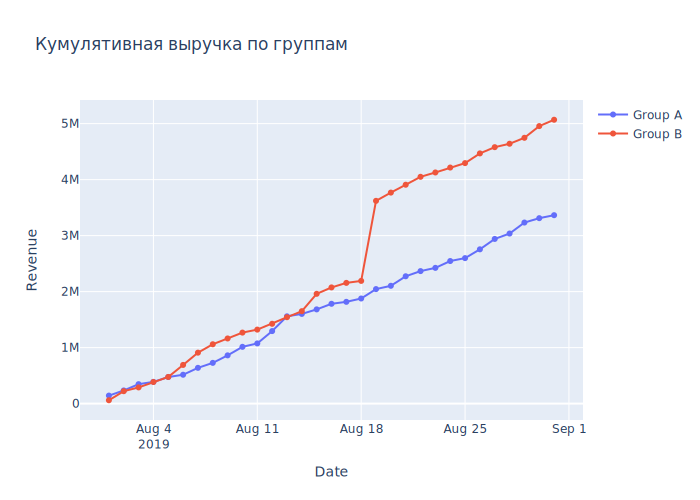

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cumulativeRevenueA['date'], 
                         y=cumulativeRevenueA['revenue'],
                         mode='lines+markers', name='Group A'))
fig.add_trace(go.Scatter(x=cumulativeRevenueB['date'],
                         y=cumulativeRevenueB['revenue'],
                         mode='lines+markers', name='Group B'))

fig.update_layout(title='Кумулятивная выручка по группам',
                  xaxis_title='Date',
                  yaxis_title='Revenue')

fig.show()

Выручка растет на протяжении всего теста - это отлично. Так же выручка у группы B регулярно больше, чем у A.   

Вдобавок видим резкий скачок у группы B 19 августа. В эту дату либо было слишком много заказов, либо был очень дорогой заказ. Это выброс, в дальнейшем мы с ним разберемся

### Построим график кумулятивного среднего чека по группам.

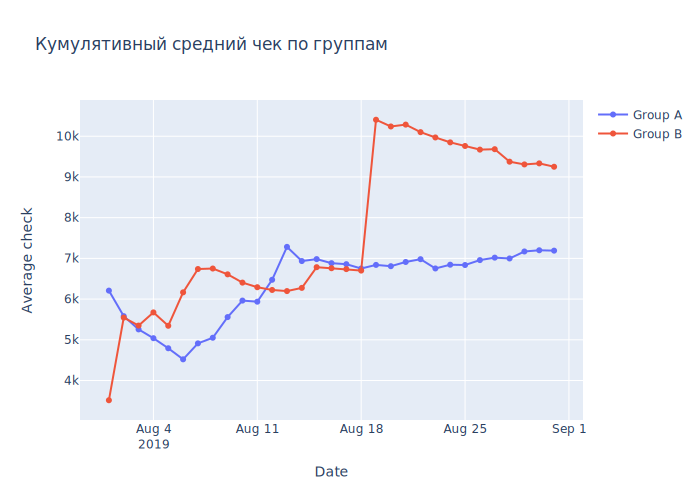

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cumulativeRevenueA['date'], 
                         y=cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],
                         mode='lines+markers', name='Group A'))
fig.add_trace(go.Scatter(x=cumulativeRevenueB['date'],
                         y=cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],
                         mode='lines+markers', name='Group B'))

fig.update_layout(title='Кумулятивный средний чек по группам',
                  xaxis_title='Date',
                  yaxis_title='Average check')

fig.show()

Средний чек сильно колебался в начале теста, с 14 августа начал выравниваться. Видим тот же выброс 19 августа. Если бы этот всплекс был из-за одинчного дорогого заказа, то на следующий день средний чек бы резко упал, но мы видим, что он хоть и падает, но плавно. 

А средний чек у группы A стал равномерным и установился на своем уровне

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Замерджим данные в один датафрейм

In [28]:
mergedCumulativeRevenue = (
    pd.merge(cumulativeRevenueA, cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])
)

mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


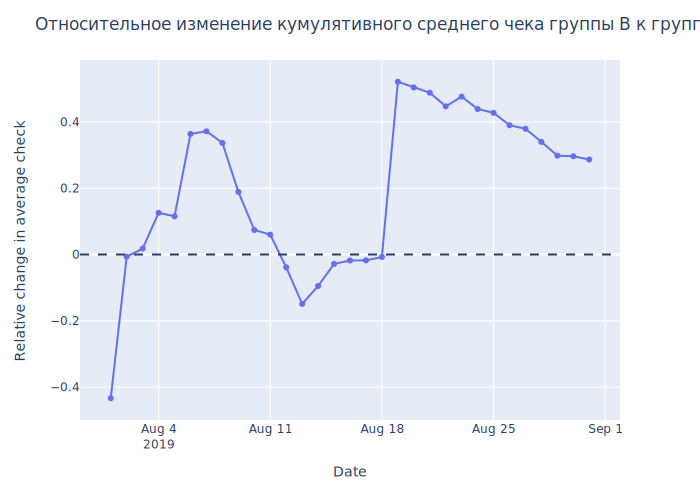

In [29]:
fig = px.scatter(mergedCumulativeRevenue,
                 x='date',
                 y=(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

fig.update_traces(mode='lines+markers')
fig.update_layout(title='Относительное изменение кумулятивного среднего чека группы B к группе A',
                  xaxis_title='Date',
                  yaxis_title='Relative change in average check')
fig.add_hline(y=0, line_dash="dash")

fig.show()

Видим резкие скачки - наши выбросы.

### Построим график кумулятивной конверсии по группам.

Рассчитаем конверсию

In [30]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData.query('group == "A"')
cumulativeDataB = cumulativeData.query('group == "B"')

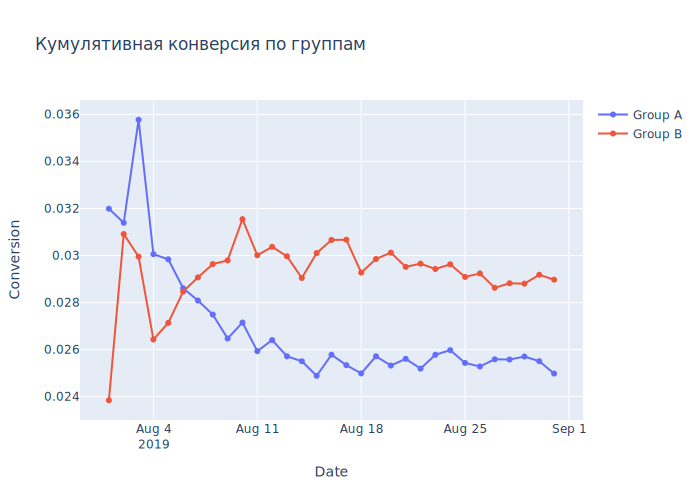

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cumulativeDataA['date'], 
                         y=cumulativeDataA['conversion'],
                         mode='lines+markers', name='Group A'))
fig.add_trace(go.Scatter(x=cumulativeDataB['date'],
                         y=cumulativeDataB['conversion'],
                         mode='lines+markers', name='Group B'))

fig.update_layout(title='Кумулятивная конверсия по группам',
                  xaxis_title='Date',
                  yaxis_title='Conversion')

fig.show()

В начале теста группы колебались, группа A была лидером, спустя 5 дней группы поменялись местами, группа B вырвалась вперед и почти месяц держит уверенное лидерство. Можно сказать, что конверсии закрепились на своих уровнях.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

In [32]:
mergedCumulativeConversions = (
    pd.merge(cumulativeDataA[['date','conversion']], cumulativeDataB[['date','conversion']],
             on='date', how='left', suffixes=['A', 'B'])
)

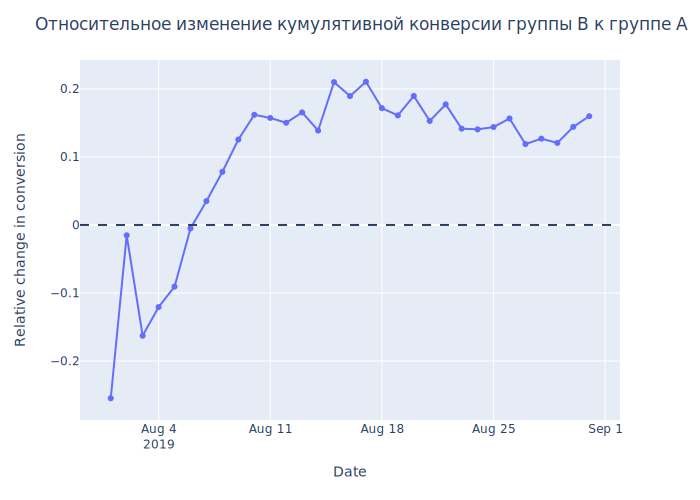

In [33]:
fig = px.scatter(mergedCumulativeConversions,
                 x='date',
                 y=mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

fig.update_traces(mode='lines+markers')
fig.update_layout(title='Относительное изменение кумулятивной конверсии группы B к группе A',
                  xaxis_title='Date',
                  yaxis_title='Relative change in conversion')
fig.add_hline(y=0, line_dash="dash")

fig.show()

В начале теста группы колебались, спустя 5 дней группа B вырвалась вперед и продолжает расти.

### Построим точечный график количества заказов по пользователям.

Для начала подсчитаем количество заказов по пользователям

In [34]:
ordersByUsers = (
    orders
        .drop(['group', 'revenue', 'date'], axis=1)
        .groupby('visitorId', as_index=False)
        .agg({'transactionId':'nunique'})
        .rename(columns={'visitorId':'user_id',
                         'transactionId':'orders'})
)

ordersByUsers.sort_values(by='orders', ascending=False).head()

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


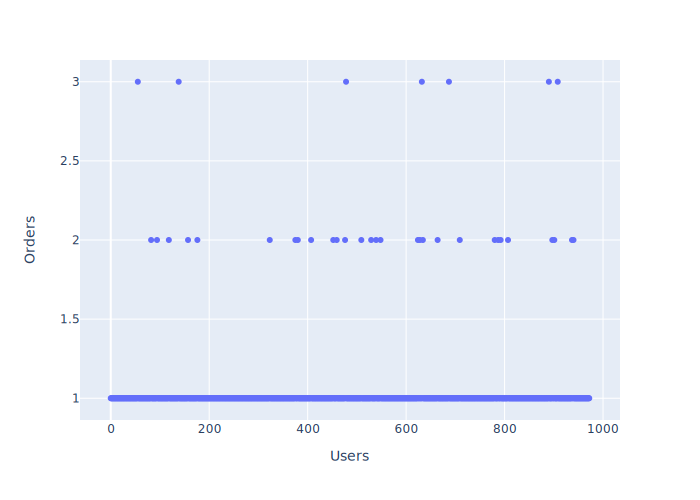

In [35]:
x_values = pd.Series(range(0,len(ordersByUsers)))

fig = px.scatter(x=x_values, y=ordersByUsers['orders'])
fig.update_layout(xaxis_title='Users',
                  yaxis_title='Orders')

fig.show()

Много пользователей с 2-3 заказами. Пока нельзя сказать, являются они аномалиями или нет. Для выбора границы рассчитаем перцентили количества заказов

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [36]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали больше 1 заказа и не более 1% - больше 2 заказов.

Думаю, верным будет принять за нижнюю границу 2 заказа на одного пользователя. По ней и будем отсеивать аномальных пользователей 

### Построим точечный график стоимостей заказов.

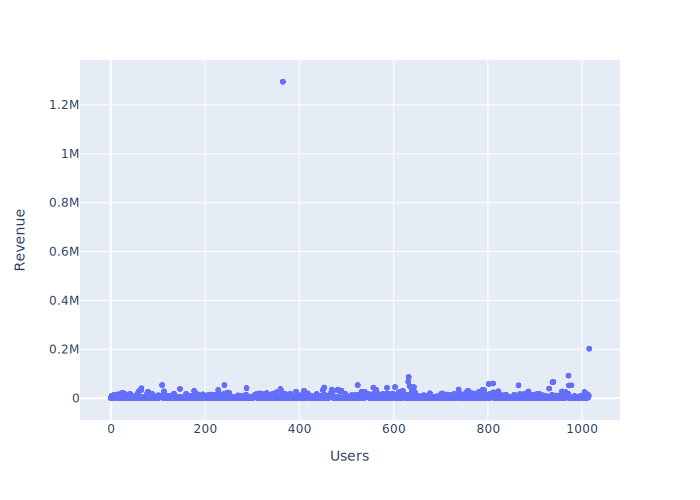

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))

fig = px.scatter(x=x_values, y=orders['revenue'])
fig.update_layout(xaxis_title='Users',
                  yaxis_title='Revenue')

fig.show()

Вот и видим аномальное значение в 1.3 млн. Для выбора верной границы рассчитаем 95 и 99 пернцентили

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов дороже 26785 и не более 1% - 53904.

За нижнюю границу примем 26785.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

* H0 (нулевая гипотеза) - между группами A и B по "сырым" данным нет различий в конверсии
* H1 (альтернативная гипотеза) - есть различия в конверсии между группами (больше или меньше)

In [39]:
visitorsADaily = visitors.query('group == "A"')[['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors.query('group == "B"')[['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders.query('group == "A"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders.query('group == "B"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head() 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [40]:
ordersByUsersA = (
    orders
        .query('group == "A"')
        .groupby('visitorId', as_index=False)
        .agg({'transactionId':'nunique'})
        .rename(columns={'visitorId':'user_id',
                         'transactionId':'orders'})
)

ordersByUsersB = (
    orders
        .query('group == "B"')
        .groupby('visitorId', as_index=False)
        .agg({'transactionId':'nunique'})
        .rename(columns={'visitorId':'user_id',
                         'transactionId':'orders'})
)

In [41]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Так как у нас двусторонний тест, то нужно указать параметр alternative='two_sided'

In [42]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]))
print("{0:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
16.0%


P-value у нас 0.011 меньше 0.05, значит нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. По "сырым" данным различия в конверсии между группами A и B присутствуют.

Относительный прирост конверсии группы B составил 16%, оно и видно по графикам

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

* H0 (нулевая гипотеза) - между группами A и B по "сырым" данным нет различий в среднем чеке
* H1 (альтернативная гипотеза) - есть различия в среднем чеке между группами (больше или меньше)

In [43]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'], alternative="two-sided")[1]))
print('{0:.1%}'.format(orders.query('group == "B"')['revenue'].mean()/orders.query('group == "A"')['revenue'].mean()-1))

p-value: 0.829
28.7%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Тем не менее, средний чек группы B значительно выше среднего чека группы A (на 28.7%).

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

* H0 (нулевая гипотеза) - между группами A и B по "очищенным" данным нет различий в конверсии
* H1 (альтернативная гипотеза) - есть различия в конверсии между группами (больше или меньше)

За нижнюю границу мы приняли - более 2 заказов на пользователя или сумма заказа дороже 26785. Делаем срез

In [44]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA.query('orders > 2')['user_id'],
        ordersByUsersB.query('orders > 2')['user_id'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders.query('revenue > 26785')['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
58


Всего аномальных пользователей - 58.

"Чистим" данные и применяем критерий Манна-Уитни

In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [46]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]))
print('{0:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.012
18.2%


Результаты по конверсии у нас практически одни и те же.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

* H0 (нулевая гипотеза) - между группами A и B по "очищенным" данным нет различий в среднем чеке
* H1 (альтернативная гипотеза) - есть различия в среднем чеке между группами (больше или меньше)

In [47]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        alternative="two-sided")[1]
    )
)

print(
    "{0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.646
-4.8%


P-value практически не изменился, хотя средний чек у группы B заметно просел и стал чуть меньше группы A.

# Вывод

Вывод по результатам теста:
* Присутствует статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B намного лучше A и нет оснований полагать, что выручка группы B станет меньше A;
* График различия среднего чека говорит о том, что результаты группы B увеличивались пол месяца, затем после резкого скачка начали уменьшаться, но при этом продолжают держаться на уровень выше группы A.

Итак, по результатам исследования я больше склоняюсь к тому, что тест следует остановить, и зафиксировать победу группы B.